<h1 align='center'>SLR on Dhaka Rent</h1>

## Step 1: `import` all libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load Dataset

In [173]:
df = pd.read_csv("Dhaka_Rent.csv", sep=";")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


## Step 3.1: Observe (Dataset)

- No need to perform `df.shape()` as `.info()` shows more information including the shape

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


- `DataFrame.isnull()` Returns boolean values like `True` = 1 and `False` = 0. For each null value it returns 1
- `.sum()` used to sum all of these.
- It performs in each column

In [175]:
df.isnull().sum()

area    0
rent    0
dtype: int64

## Step 3.2: Observe (Visualize)

- Graph between any two columns: `plt.scatter(df['X_axis'], df['Y_axis'])`

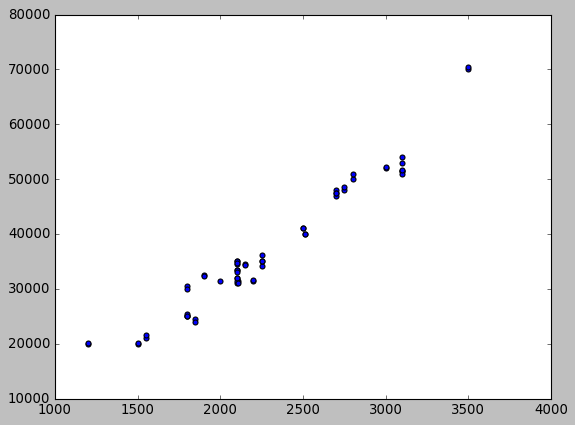

In [176]:
plt.scatter(df['area'], df['rent'])

### Customizing the graph
**Themes:** To see available themes, run `plt.style.available`

In [ ]:
plt.style.available

- classic
- dark_background
- seaborn-v0_8-paper

Text(0, 0.5, 'Rent Cost')

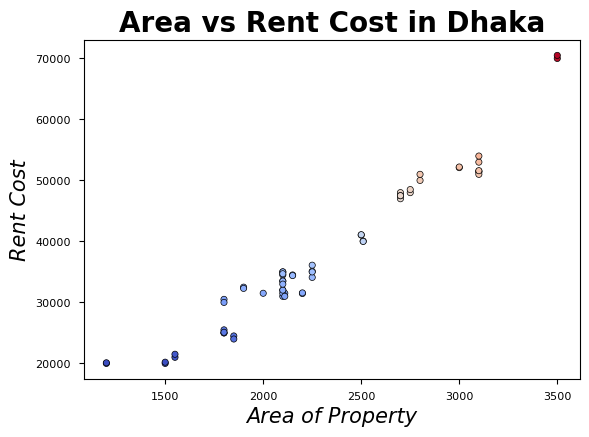

In [11]:
plt.style.use('seaborn-v0_8-paper')
plt.scatter(df["area"],      # X-axis
            df["rent"],      # Y-axis
            c = df["rent"],  # Point color mapped to data values
            cmap='coolwarm', # Colormap used for color gradient
            s=20,            # Size of each dot
            alpha=1,         # Opacity (1.0 = solid, 0 = transparent)
            edgecolor='k',   # Border color of dots ('k' = black)
            linewidths=.5    # Thickness of marker edge lines      
#            marker='x'      # More unfilled markers: 'x', '+', '1', '2'
            )
plt.title("Area vs Rent Cost in Dhaka", fontsize=20, weight='bold')
plt.xlabel("Area of Property", fontsize=15, fontstyle='italic')
plt.ylabel("Rent Cost", fontsize=15, fontstyle='italic')

<h1 align='center'>SLR With Hardcoded Formula</h1>

In [177]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [178]:
X = df["area"]
Y = df["rent"]

m = np.sum((X - np.mean(X))*(Y - np.mean(Y)))/np.sum((X - np.mean(X))**2)
print(m)

21.292661473611954


In [179]:
# Variables
X = df["area"]
Y = df["rent"]
X_bar = np.mean(X)
Y_bar = np.mean(Y)

# Fomula
m = np.sum((X - X_bar)*(Y - Y_bar))/np.sum((X - X_bar)**2)
c = Y_bar - (m * X_bar)

# Result
print("m = ", m)
print("c = ", c)

m =  21.292661473611954
c =  -11469.7354464311


### Now test the outcome

In [182]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [181]:
in_area = int(input("Enter an area to predict the rent price: "))
predict = m * in_area + c
print(f"Area {in_area} = {predict:.2f} Taka")

Enter an area to predict the rent price:  1311


Area 1311 = 16444.94 Taka


<h1 align='center'>SLR With SkLearn</h1>

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
X = df[["area"]]
Y = df["rent"]
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [190]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 21.29266147361196
Intercept (c): -11469.735446431114


In [194]:
# Check the pridected column
df2 = df.copy()
df2["predicted"] = model.predict(df[["area"]])
df2.head()

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


### Check the graph with predicted points

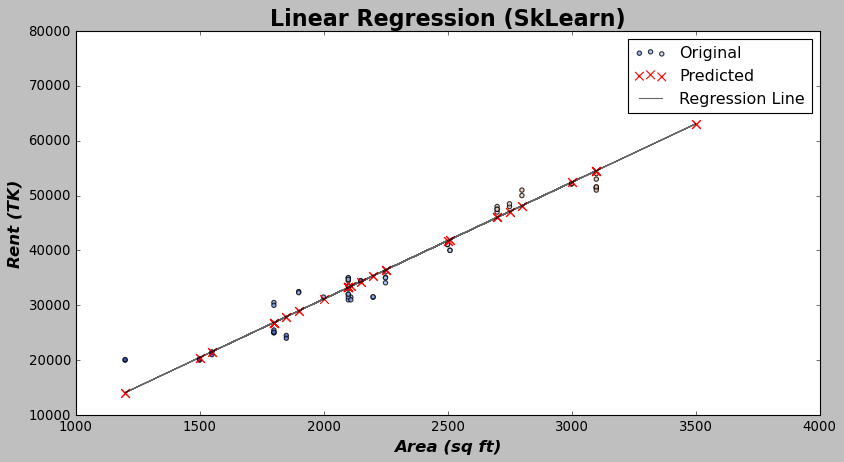

In [191]:
# Setting the figure height and weight
plt.figure(figsize=(12,6))
plt.style.use('classic')

# Setting all labels and title
plt.title("Linear Regression (SkLearn)", fontsize=20, weight ="bold")
plt.xlabel("Area (sq ft)", fontsize = 15, fontstyle = "italic", weight="bold")
plt.ylabel("Rent (TK)", fontsize = 15, fontstyle = "italic", weight="bold")

# Plotting Original points
plt.scatter(df["area"], df["rent"], 
            c = df["rent"], 
            marker=".", 
            cmap = "coolwarm", 
            s = 60, alpha = .80, 
            edgecolor='k', 
            label = "Original")

# plotting predicted points
plt.scatter(df["area"],  model.predict(X), 
            color='red', 
            marker = "x", 
            s = 60, 
            label = "Predicted")

# Plotting regression line
plt.plot(df["area"], model.predict(X), 
         color='black', 
         label="Regression Line",
         alpha = 0.6)

# show the rerult
plt.legend()
plt.show()

In [ ]:
### Calculate Residuals error


### Predicting from user input

Enter an area:  3000


/home/mashud/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted rent for area 3000 sqft: 52408.25


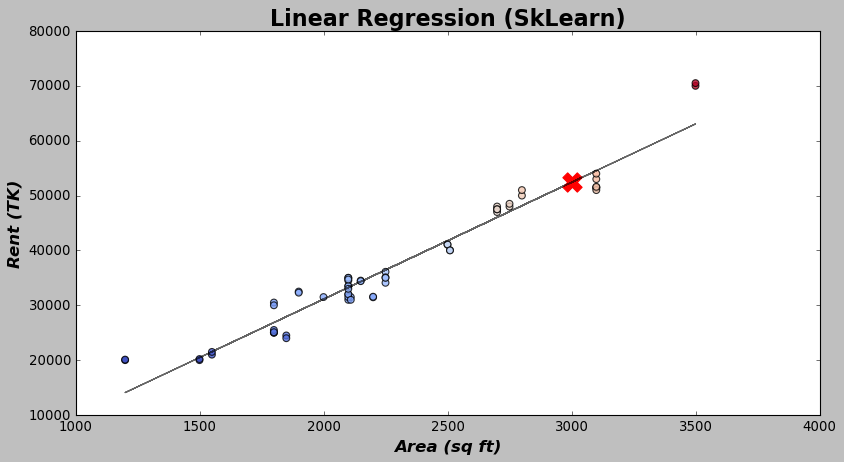

In [195]:
user_area = int(input("Enter an area: "))
predicted_rent = model.predict([[user_area]])

print(f"Predicted rent for area {user_area} sqft: {predicted_rent[0]:.2f}")

# Setting the figure height and weight
plt.figure(figsize=(12,6))
plt.style.use('classic')

# Setting all labels and title
plt.title("Linear Regression (SkLearn)", fontsize=20, weight ="bold")
plt.xlabel("Area (sq ft)", fontsize = 15, fontstyle = "italic", weight="bold")
plt.ylabel("Rent (TK)", fontsize = 15, fontstyle = "italic", weight="bold")


# Plotting Original points
plt.scatter(df["area"], df["rent"], 
            c = df["rent"], 
            marker=".", 
            cmap = "coolwarm", 
            s = 150, 
            alpha = .80, 
            edgecolor='k', 
            label = "Original")

# plotting predicted points
plt.scatter(user_area,  predicted_rent[0],
            color='red', 
            marker = "X", 
            s = 300, 
            label = "Predicted",
           )

# Plotting regression line
plt.plot(df["area"], model.predict(X), 
         color='black', 
         label="Regression Line",
         alpha = 0.6)
# plt.legend()
plt.show()